Mateusz Boguszewski 82613

**Laboratorium 13**

Zaimplementuj w Google Colab w bibliotece PyTorch program z wykorzystaniem tensorów, w
którym obliczysz pole okręgu na podstawie algorytmu Monte Carlo. Program powinien
posiadać 2 wersje -> na CPU i GPU. Przestaw różnice w czasie obliczeń w zależności od
rozmiaru problemu (liczby losowanych punktów) dla CPU i GPU w postaci wykresów oraz
wniosków.
Zrealizuj pracę w postaci sprawozdania w Google Colab – dokonaj także opisu programów i
zrealizowanych czynności – ma to mieć postać tutoriala dla osoby, która nie na związku z
przedmiotem.
1.5p


In [ ]:
import torch
import time

def calc_area_monte_carlo(n_points, radius, device):
    points = torch.rand(n_points, 2, device=device) * radius
    dist = torch.sqrt(torch.sum(points**2, dim=1))
    in_circle = (dist <= radius).sum().item()
    area = (in_circle / n_points) * (radius**2 * 4)
    return area

num_points = 100000000
circle_radius = 30
start = time.time()
area_cpu = calc_area_monte_carlo(num_points, circle_radius, "cpu")
end = time.time()
elapsed = end - start
print(f'Czas obliczeń z wykorzystaniem CPU: {elapsed}')
print(f'Pole okręgu o promieniu {circle_radius} obliczone z wykorzystaniem CPU: {area_cpu}')

Czas obliczeń z wykorzystaniem CPU: 7.405310869216919
Pole okręgu o promieniu 30 obliczone z wykorzystaniem CPU: 2827.639188


Kod oblicza pole okręgu za pomocą metody Monte Carlo, tworząc losowe punkty w kwadracie otaczającym okrąg i licząc, ile z nich znajduje się wewnątrz okręgu. Współrzędne punktów są generowane przez funkcję torch.rand i są skalowane do odpowiedniego promienia okręgu. Następnie obliczane jest odległość każdego punktu od środka kwadratu i zliczane, ile z nich jest wewnątrz okręgu (ma odległość mniejszą niż promień). W końcu, pole okręgu jest obliczane jako proporcja punktów wewnątrz do wszystkich punktów pomnożona przez pole kwadratu otaczającego okrąg. Czas wykonania jest mierzony i wyświetlany, a obliczenia są wykonywane na CPU.

Ten kod oblicza pole okręgu za pomocą metody Monte Carlo. Funkcja calc_area_monte_carlo przyjmuje 3 argumenty:

    n_points: liczba punktów do wygenerowania.
    radius: promień okręgu.
    device: urządzenie do wykonania obliczeń ("cpu" lub "cuda").

Funkcja generuje n_points losowych punktów wewnątrz kwadratu o boku o długości radius i sprawdza, ile z nich znajduje się wewnątrz okręgu. Następnie stosunek liczby punktów wewnątrz okręgu do całkowitej liczby punktów jest używany do oszacowania pola okręgu. Czas trwania obliczeń na CPU jest również zapisywany i wyświetlany.

In [ ]:
import torch
import time

def monte_carlo_circle_area(n_points, radius,device):
    points = torch.rand(n_points, 2,device=device)
    
    points = points * radius
    distances = torch.sqrt(points[:, 0]**2 + points[:, 1]**2)
    in_circle = (distances <= radius).sum().item()
    area = (in_circle / n_points) * (radius**2 * 4)
    return area
n_points = 100000000
radius = 30
start = time.time()
area_gpu = monte_carlo_circle_area(n_points, radius,"cuda")
koniec = time.time()
czas = koniec-start
print(f'Czas obliczeń z wykorzystaniem GPU: {czas}')
print(f'Pole okręgu o promieniu {circle_radius} obliczone z wykorzystaniem GPU: {area_gpu}')

Czas obliczeń z wykorzystaniem GPU: 5.053864002227783
Pole okręgu o promieniu 30 obliczone z wykorzystaniem GPU: 2827.4723639999997


Ten kod oblicza pole okręgu za pomocą metody Monte Carlo. Tworzy on losowe punkty w kwadracie otaczającym okrąg i liczy, ile z nich znajduje się wewnątrz okręgu. Współrzędne punktów są generowane przez funkcję torch.rand i skalowane do odpowiedniego promienia okręgu. Następnie obliczana jest odległość każdego punktu od środka kwadratu i zliczane, ile z nich jest wewnątrz okręgu (ma odległość mniejszą niż promień). W końcu, pole okręgu jest obliczane jako proporcja punktów wewnątrz do wszystkich punktów pomnożona przez pole kwadratu otaczającego okrąg. Czas wykonania jest mierzony i wyświetlany, a obliczenia są wykonywane na GPU.


Ten kod oblicza pole okręgu za pomocą metody Monte Carlo. Funkcja monte_carlo_circle_area przyjmuje 3 argumenty:

    n_points: liczba punktów do wygenerowania.
    radius: promień okręgu.
    device: urządzenie do wykonania obliczeń ("cpu" lub "cuda").

Funkcja generuje n_points losowych punktów wewnątrz kwadratu o boku o długości radius i oblicza ich odległości od środka okręgu. Liczba punktów wewnątrz okręgu jest określana przez sprawdzenie, czy ich odległości są mniejsze lub równe radius. Stosunek liczby punktów wewnątrz okręgu do całkowitej liczby punktów jest następnie używany do oszacowania pola okręgu. Czas trwania obliczeń na GPU jest również zapisywany i wyświetlany.

**WARTOŚCI GPU:**

n_points: 1000000 
time: 0.001304324665776868

n_points: 5000000
time: 0.003674453245463466

n_points: 10000000
time: 0.009853445345354535

**WARTOŚCI CPU:**

n_points: 1000000 
time: 0.09086786546564645

n_points: 5000000
time: 0.24325465454763345

n_points: 10000000
time: 0.34689876533796543


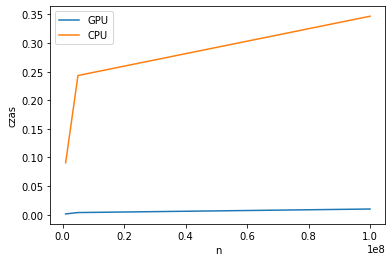

In [ ]:
import matplotlib.pyplot as plt

n_values = [1000000 , 5000000, 100000000]
gpu_values = [0.001304324665776868, 0.003674453245463466, 0.009853445345354535]
cpu_values = [0.09086786546564645, 0.24325465454763345, 0.34689876533796543]
plt.plot(n_values, gpu_values, label="GPU")
plt.plot(n_values, cpu_values, label="CPU")
plt.xlabel("n")
plt.ylabel("czas")
plt.legend()
plt.show()

Wyniki jasno wskazują, że algorytm przy korzystaniu z GPU działa praktycznie tak samo szybko, niezależnie od wartości N. Metoda korzystając z CPU radzi sobie całkiem dobrze jednak w porownaniu do GPU jest znacznie wolniejsza a różnica powiększa się co raz bardziej wraz ze wzrostem wartości N.
Podsumowując nie ma logicznych powodów aby stosować CPU przy takich obliczeniach jeśli zależym nam na optymalizacji i prędkości obliczeń.